# 이동평균선을 이용한 Simple trading strategy 

- fast signal (단기 이동평균) 이 slow signal (장기 이동평균)위에 있으면 1 주 보유, 아래에 있으면 0 주 보유 전략  
- 종가에 매수, 매도 한다고 가정. 거래비용 없다고 가정.

- MA10 >= MA50 : 1 주 보유 (매수 or hold), MA10 < MA50 : 0 주 보유 (매도 or no action)  
 
- Daily Profit 계산

- 누적 수익 계산

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr

short = 10
long = 50  # 100, 200

In [16]:
ms = fdr.DataReader("MSFT", start="20200101")  #Microsoft
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,156.151917,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,154.207581,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,154.606186,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,153.196503,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,155.636688,27746500


In [17]:
ms.drop(['High', 'Low', 'Open', 'Volume', 'Close'], axis=1, inplace=True)

In [18]:
ms['MA_SHORT'] = ms['Adj Close'].rolling(short).mean()
ms['MA_LONG'] = ms['Adj Close'].rolling(long).mean()
ms['Shares'] = [1 if ms.loc[day, 'MA_SHORT'] >= ms.loc[day, 'MA_LONG'] 
                else 0 for day in ms.index]
ms.head()

,Adj Close,MA_SHORT,MA_LONG,Shares
Date,,,,
2020-01-02,156.151917,NaN,NaN,0
2020-01-03,154.207581,NaN,NaN,0
2020-01-06,154.606186,NaN,NaN,0
2020-01-07,153.196503,NaN,NaN,0
2020-01-08,155.636688,NaN,NaN,0


In [19]:
ms.tail()

,Adj Close,MA_SHORT,MA_LONG,Shares
Date,,,,
2022-12-21,244.429993,247.984999,239.978447,1
2022-12-22,238.190002,247.064000,240.239935,1
2022-12-23,238.729996,246.395000,240.342900,1
2022-12-27,236.960007,244.840001,240.523746,1
2022-12-28,234.529999,242.601000,240.477097,1


In [20]:
ms['NextDay Close'] = ms['Adj Close'].shift(-1)
ms.head()

,Adj Close,MA_SHORT,MA_LONG,Shares,NextDay Close
Date,,,,,
2020-01-02,156.151917,NaN,NaN,0,154.207581
2020-01-03,154.207581,NaN,NaN,0,154.606186
2020-01-06,154.606186,NaN,NaN,0,153.196503
2020-01-07,153.196503,NaN,NaN,0,155.636688
2020-01-08,155.636688,NaN,NaN,0,157.581085


Text(0.5, 1.0, 'short = 10, long = 50')

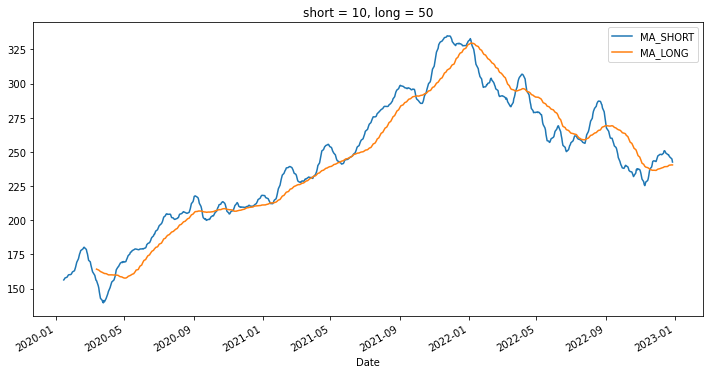

In [21]:
ms[['MA_SHORT', 'MA_LONG']].plot(figsize=(12, 6))
plt.title(f"short = {short}, long = {long}")

## Daily Profit

In [22]:
# Daily Profit 계산
ms['Profit'] = [ms.loc[day, 'NextDay Close'] - ms.loc[day, 'Adj Close'] 
                if ms.loc[day, 'Shares'] == 1 else 0 for day in ms.index]

ms.iloc[100:105]

,Adj Close,MA_SHORT,MA_LONG,Shares,NextDay Close,Profit
Date,,,,,,
2020-05-27,177.728867,178.445137,164.876294,1,177.328079,-0.400788
2020-05-28,177.328079,178.655237,165.565216,1,179.136551,1.808472
2020-05-29,179.136551,178.970146,166.410603,1,178.725983,-0.410568
2020-06-01,178.725983,178.987616,167.202740,1,180.759308,2.033325
2020-06-02,180.759308,179.037821,168.140047,1,181.199203,0.439895


In [23]:
ms['Profit'].min(), ms['Profit'].max(), ms['Profit'].mean()

(-14.06178300000002, 14.809996999999981, -0.020962330677290773)

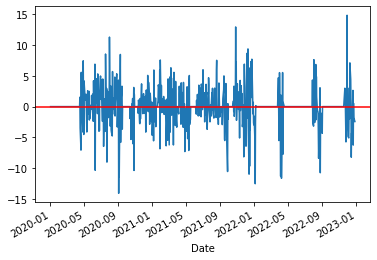

In [24]:
# red line 위쪽은 make money 아래는 lose money
ms['Profit'].plot()
plt.axhline(y=0, color='r')  

## 누적 수익

In [28]:
ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Adj Close,MA_SHORT,MA_LONG,Shares,NextDay Close,Profit,wealth
Date,,,,,,,
2022-12-21,244.429993,247.984999,239.978447,1,238.190002,-6.239991,-12.124632
2022-12-22,238.190002,247.064000,240.239935,1,238.729996,0.539994,-11.584638
2022-12-23,238.729996,246.395000,240.342900,1,236.960007,-1.769989,-13.354627
2022-12-27,236.960007,244.840001,240.523746,1,234.529999,-2.430008,-15.784635
2022-12-28,234.529999,242.601000,240.477097,1,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

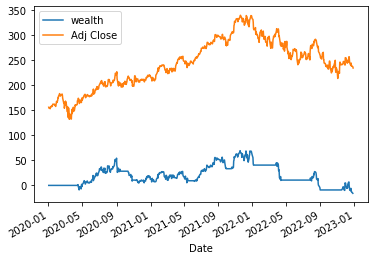

In [29]:
ms[['wealth', 'Adj Close']].plot()

MA_SHORT >= MA_LONG : 1 주 보유 (매수 or hold), MA_SHORT < MA_LONG : 0 주 보유 
이 전략으로 1092일 동안 1주 매매로 얻은 수익 : -15.78 


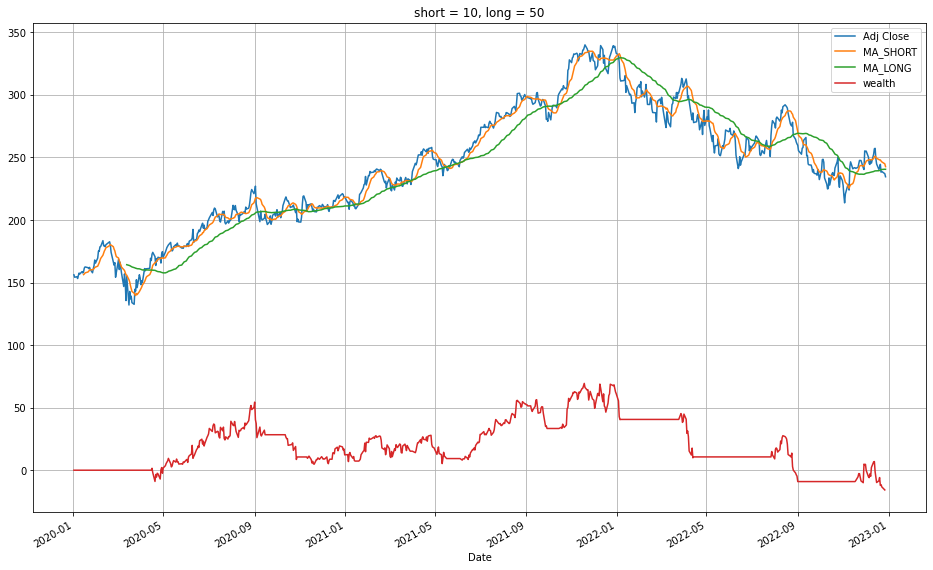

In [30]:
n_days = len(pd.date_range(ms.index[0], ms.index[-1]))

print('MA_SHORT >= MA_LONG : 1 주 보유 (매수 or hold), MA_SHORT < MA_LONG : 0 주 보유 ')
print(f"이 전략으로 {n_days}일 동안 1주 매매로 얻은 수익 : {ms.loc[ms.index[-2], 'wealth']:.2f} ")

ms[['Adj Close', 'MA_SHORT', 'MA_LONG', 'wealth']].plot(figsize=(16, 10))
plt.title(f"short = {short}, long = {long}")
plt.grid()